In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import os

churn_data=pd.read_csv("groupscore.csv", index_col=[0,1])
churn_data

#churn_data=churn_data[churn_data['post_per_month'] != 0]

,,metric_group_0,metric_group_1,account_tenure,dislike_per_month,unfriend_per_month,is_churn
account_id,observation_date,,,,,,
15,2020-02-09,0.831740,-1.114721,-1.209611,-1.051739,-0.543621,False
81,2020-02-09,-0.571413,1.267976,-1.209611,-0.127564,-0.543621,False
127,2020-02-09,0.454603,-0.763948,-1.209611,1.117846,-0.543621,False
153,2020-02-09,1.388334,-1.566442,-1.209611,-0.398629,-0.543621,False
177,2020-02-09,1.823400,-0.293715,-1.209611,1.235779,-0.543621,False
...,...,...,...,...,...,...,...
13132,2020-05-10,-0.997260,-0.075370,-1.243188,-0.780674,-0.543621,False
13141,2020-05-10,-1.366662,-0.527328,-1.243188,-1.433784,-0.543621,False
13155,2020-05-10,-2.336760,0.429603,-1.243188,-1.433784,-0.543621,False


In [6]:
ncohort = 10
[i for i in range(1, ncohort + 1)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
groups = pd.qcut(churn_data["metric_group_0"], ncohort, duplicates='drop')
groups

account_id  observation_date
15          2020-02-09            (0.498, 0.891]
81          2020-02-09          (-0.639, -0.347]
127         2020-02-09            (0.197, 0.498]
153         2020-02-09            (0.891, 1.498]
177         2020-02-09           (1.498, 11.248]
                                      ...       
13132       2020-05-10          (-1.418, -0.971]
13141       2020-05-10          (-1.418, -0.971]
13155       2020-05-10          (-3.046, -1.418]
13171       2020-05-10          (-0.0772, 0.197]
13248       2020-05-10           (1.498, 11.248]
Name: metric_group_0, Length: 32900, dtype: category
Categories (10, interval[float64, right]): [(-3.046, -1.418] < (-1.418, -0.971] < (-0.971, -0.639] < (-0.639, -0.347] ... (0.197, 0.498] < (0.498, 0.891] < (0.891, 1.498] < (1.498, 11.248]]

de 85 a 3255 son los que tienen menos 

se empieza a agrandar 

son valores no repetidos


In [11]:
cohort_means = churn_data.groupby(groups, observed=False)["metric_group_0"].mean()
cohort_means

metric_group_0
(-3.046, -1.418]    -1.880397
(-1.418, -0.971]    -1.178918
(-0.971, -0.639]    -0.797262
(-0.639, -0.347]    -0.489741
(-0.347, -0.0772]   -0.212153
(-0.0772, 0.197]     0.057891
(0.197, 0.498]       0.342967
(0.498, 0.891]       0.687908
(0.891, 1.498]       1.157484
(1.498, 11.248]      2.312222
Name: metric_group_0, dtype: float64

In [13]:
cohort_churns = churn_data.groupby(groups, observed=False)["is_churn"].mean()
cohort_churns

metric_group_0
(-3.046, -1.418]     0.043465
(-1.418, -0.971]     0.022492
(-0.971, -0.639]     0.017629
(-0.639, -0.347]     0.015198
(-0.347, -0.0772]    0.013982
(-0.0772, 0.197]     0.011246
(0.197, 0.498]       0.009119
(0.498, 0.891]       0.011246
(0.891, 1.498]       0.010942
(1.498, 11.248]      0.013982
Name: is_churn, dtype: float64

In [16]:
plot_frame = pd.DataFrame(
    {
        'metric_group_0': cohort_means.values,
        'churn_rate' : cohort_churns.values
    })
plot_frame

,metric_group_0,churn_rate
0,-1.880397,0.043465
1,-1.178918,0.022492
2,-0.797262,0.017629
3,-0.489741,0.015198
4,-0.212153,0.013982
5,0.057891,0.011246
6,0.342967,0.009119
7,0.687908,0.011246
8,1.157484,0.010942
9,2.312222,0.013982


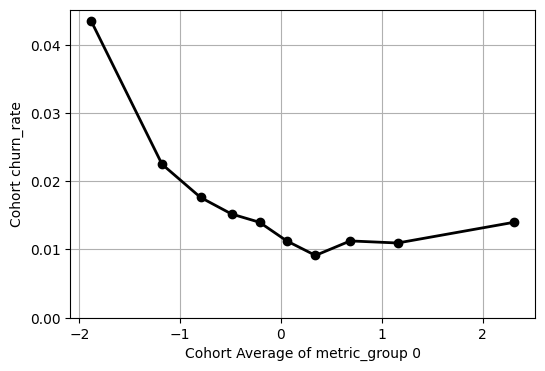

In [20]:
plt.figure(figsize=(6,4))
plt.plot('metric_group_0', 
         'churn_rate', 
         data=plot_frame, 
         label='metric_group_0', 
         marker='o', 
         linewidth=2, 
         color='black')

plt.xlabel("Cohort Average of metric_group 0")
plt.ylabel("Cohort churn_rate")
plt.grid()
plt.gca().set_ylim(bottom=0)
#plt.gca().set_xscale('log')
plt.savefig("grouped_cohort.png")

mean zero

is average is zero

1 standard deviation above or below the average

if 1 or -1


